## Team 14 CSE473s project

In [19]:
import sys
from pathlib import Path

# Add the project root to sys.path dynamically
project_root = Path().resolve().parent  # notebooks/parent = project root
sys.path.append(str(project_root / "lib"))

# imports
import numpy as np
from layers import Dense
from activations import Tanh, Sigmoid, ReLU
from network import NeuralNetwork
from losses import MSE
from optimizer import SGD
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

def numerical_gradient_check(model, X, y, loss_fn, epsilon=1e-5):
    # Forward pass
    y_pred = model.forward(X)
    loss = loss_fn.loss(y, y_pred)

    # get analytical gradients
    grad = loss_fn.grad(y, y_pred)
    model.backward(grad)

    # Loop 
    for layer_index, layer in enumerate(model.layers):
        params = layer.params()
   

        print(f"\nChecking layer {layer_index} ({layer.__class__.__name__})")
        
        for (param, grad_param) in params:
         
            it = np.nditer(param, flags=['multi_index'], op_flags=['readwrite'])

            while not it.finished:
                idx = it.multi_index
            
                original_value = param[idx]
                
                #  L(W + epsilon)
                param[idx] = original_value + epsilon
                plus_loss = loss_fn.loss(y, model.forward(X))
                
                #  L(W - epsilon)
                param[idx] = original_value - epsilon
                minus_loss = loss_fn.loss(y, model.forward(X))
                
                # Numerical 
                numerical_grad = (plus_loss - minus_loss) / (2 * epsilon)

                param[idx] = original_value
                
                # Analytical 
                analytical_grad = grad_param[idx]
                
                # Compare
                error = abs(numerical_grad - analytical_grad)
                
                print(f"Param {idx}: numerical={numerical_grad:.7f}, analytical={analytical_grad:.7f}, error={error:.7e}")
                
                it.iternext()


Epoch 1/1000 - loss: 1.109538
Epoch 2/1000 - loss: 1.066750
Epoch 3/1000 - loss: 1.051234
Epoch 4/1000 - loss: 1.043106
Epoch 5/1000 - loss: 1.037328
Epoch 6/1000 - loss: 1.033731
Epoch 7/1000 - loss: 1.030660
Epoch 8/1000 - loss: 1.028851
Epoch 9/1000 - loss: 1.027043
Epoch 10/1000 - loss: 1.026257
Epoch 11/1000 - loss: 1.025205
Epoch 12/1000 - loss: 1.025148
Epoch 13/1000 - loss: 1.024609
Epoch 14/1000 - loss: 1.025144
Epoch 15/1000 - loss: 1.024962
Epoch 16/1000 - loss: 1.026005
Epoch 17/1000 - loss: 1.026037
Epoch 18/1000 - loss: 1.027506
Epoch 19/1000 - loss: 1.027594
Epoch 20/1000 - loss: 1.029399
Epoch 21/1000 - loss: 1.029365
Epoch 22/1000 - loss: 1.031405
Epoch 23/1000 - loss: 1.031071
Epoch 24/1000 - loss: 1.033252
Epoch 25/1000 - loss: 1.032456
Epoch 26/1000 - loss: 1.034705
Epoch 27/1000 - loss: 1.033312
Epoch 28/1000 - loss: 1.035582
Epoch 29/1000 - loss: 1.033484
Epoch 30/1000 - loss: 1.035743
Epoch 31/1000 - loss: 1.032843
Epoch 32/1000 - loss: 1.035061
Epoch 33/1000 - l

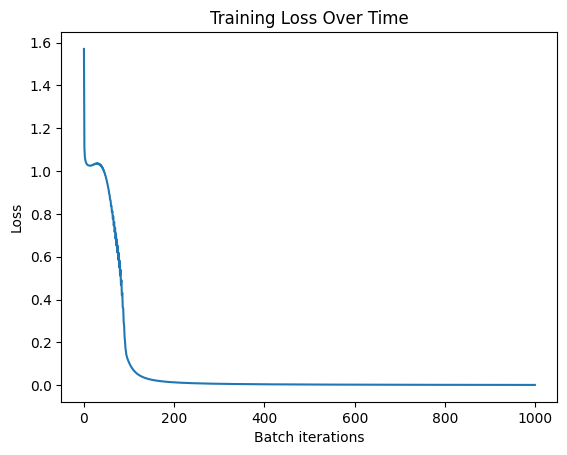

In [21]:
# dataset
X = np.array([[-1,-1],[-1,1],[1,-1],[1,1]], dtype=float)
Y = np.array([[-1],[1],[1],[-1]], dtype=float)

# model: 2 -> 4 -> 1
layers = [
    Dense(2, 4, activation=Sigmoid()),
    Dense(4, 1, activation=Tanh())
]

model = NeuralNetwork(layers, loss_function=MSE())
opt = SGD(lr=0.5)

model.train(X, Y, opt, n_epochs=1000, batch_size=4, verbose=True)
losses = model.get_loss_history()

print("predictions:", model.predict(X))
numerical_gradient_check(model, X, Y, MSE())

import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel("Batch iterations")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.show()